# LSTM Regressor

Autoregression and predict one day ahead

The main idea to train and test the model is shown as follows:
1. Split the training set and test set
2. Use the cross validation method to find the optimal combination of hyperparameters
3. Use the model to predict the data
4. Data visualization

Import library needed in the model

In [233]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Split the training set and test set

In [234]:
df=pd.read_csv('../dataset_for_analysis/data_weather_new1.csv',parse_dates=['date'])
df.set_index('date', inplace=True)

# Select the data used for model training
start_date='1990-01-01'
end_date='2020-12-31'
training_data=df[start_date:end_date]

X_mean_temp=training_data[['mean_temp','precipitation']]

In [235]:
X_mean_temp

,mean_temp,precipitation
date,,
1990-01-01,4.5,1.5
1990-01-02,5.2,0.0
1990-01-03,4.0,0.0
1990-01-04,5.3,0.0
1990-01-05,6.6,0.5
...,...,...
2020-12-27,7.5,2.0
2020-12-28,1.1,0.2
2020-12-29,2.6,0.0


Scaling the data

In [236]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))
scaled_mean_temp=scalar.fit_transform(X_mean_temp[['mean_temp']])

In [237]:
scaled_mean_temp

array([[-0.41764706],
       [-0.37647059],
       [-0.44705882],
       ...,
       [-0.52941176],
       [-0.52352941],
       [-0.72941176]])

In [238]:
timestep=90
X=[]
Y=[]
for i in range(len(X_mean_temp)-timestep-7):
    X.append(scaled_mean_temp[i:i+timestep])
    Y.append(scaled_mean_temp[i+timestep:i+timestep+7])

In [239]:
X=np.asanyarray(X)

In [240]:
Y=np.asanyarray(Y)

In [241]:
k1 = 10562
k2 = 10927
Xtrain = X[:k1,:,:]
Xtest = X[k1:k2,:,:]
X2020 = X[k2:,:,:]
Ytrain = Y[:k1]
Ytest= Y[k1:k2]
Y2020 = Y[k2:]

In [242]:
Xtrain.shape

(10562, 90, 1)

In [243]:
Ytrain.shape

(10562, 7, 1)

In [244]:
Xtest.shape

(365, 90, 1)

In [245]:
Ytest.shape

(365, 7, 1)

In [246]:
X2020.shape

(299, 90, 1)

In [247]:
Y2020.shape

(299, 7, 1)

In [248]:
Y2020

array([[[-0.23529412],
        [-0.27058824],
        [-0.32941176],
        ...,
        [-0.34705882],
        [-0.29411765],
        [-0.24117647]],

       [[-0.27058824],
        [-0.32941176],
        [-0.43529412],
        ...,
        [-0.29411765],
        [-0.24117647],
        [ 0.01764706]],

       [[-0.32941176],
        [-0.43529412],
        [-0.34705882],
        ...,
        [-0.24117647],
        [ 0.01764706],
        [-0.22352941]],

       ...,

       [[ 0.00588235],
        [ 0.02352941],
        [-0.32352941],
        ...,
        [-0.39411765],
        [-0.24117647],
        [-0.61764706]],

       [[ 0.02352941],
        [-0.32352941],
        [-0.52941176],
        ...,
        [-0.24117647],
        [-0.61764706],
        [-0.52941176]],

       [[-0.32352941],
        [-0.52941176],
        [-0.39411765],
        ...,
        [-0.61764706],
        [-0.52941176],
        [-0.52352941]]])

## Single output (predict one day ahead)

Create the instance of tensorboard to visualize the results

In [249]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir="../lstm_results/lstm_one_week_50")

In [250]:

# Initiate the model
model = Sequential()

# Define the input and convolution layer
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(90,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(7))

# Define the LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))

# Define the bidirectional LSTM layer
model.add(Bidirectional(LSTM(128, activation='relu')))

# Define the dense and output layer
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest), epochs=3, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/50
331/331 [==============================] - 32s 67ms/step - loss: 0.0307 - val_loss: 0.0242
Epoch 2/50
331/331 [==============================] - 23s 69ms/step - loss: 0.0263 - val_loss: 0.0287
Epoch 3/50
331/331 [==============================] - 23s 70ms/step - loss: 0.0260 - val_loss: 0.0252
Epoch 4/50
331/331 [==============================] - 22s 68ms/step - loss: 0.0251 - val_loss: 0.0226
Epoch 5/50
331/331 [==============================] - 23s 68ms/step - loss: 0.0239 - val_loss: 0.0231
Epoch 6/50
331/331 [==============================] - 23s 71ms/step - loss: 0.0232 - val_loss: 0.0245
Epoch 7/50
331/331 [==============================] - 23s 68ms/step - loss: 0.0211 - val_loss: 0.0257
Epoch 8/50
331/331 [==============================] - 22s 65ms/step - loss: 0.0196 - val_loss: 0.0250
Epoch 9/50
331/331 [==============================] - 24s 72ms/step - loss: 0.0179 - val_loss: 0.0268
Epoch 10/50
331/331 [==============================] - 23s 70ms/step - loss: 0.016

KeyboardInterrupt: 

Save the model

In [103]:
model.save('../lstm_results/lstm_one_week_mean_temp.hdf5')

### Module evaluation and results visualizaiton

In [104]:
from tensorflow.keras.models import load_model
model=load_model('../lstm_results/lstm_one_week_mean_temp.hdf5')

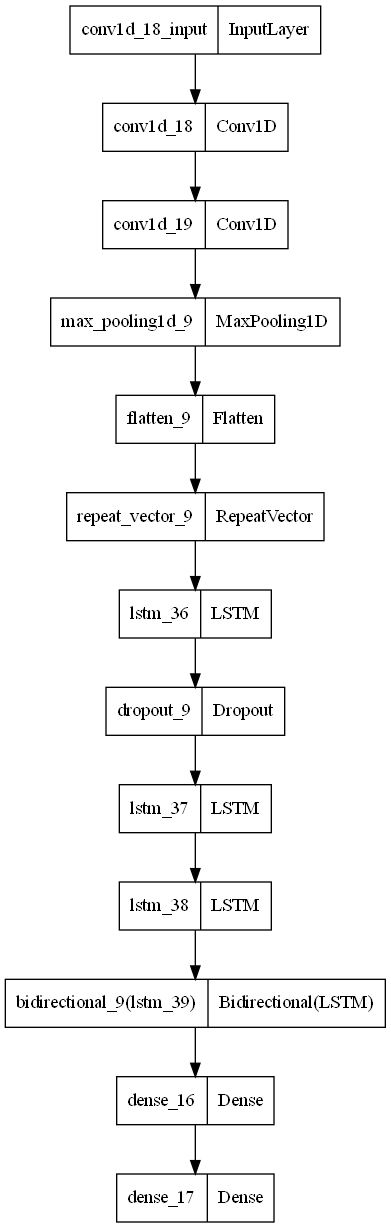

In [105]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [212]:
# Initiate the array of predicted result
predicted_result = np.zeros((299, 7, 1))

for day_idx in range(299):

    input_data = X2020[day_idx, :, :]
    daily_predictions = np.zeros((7, 1))

    # Predict the data in the next 7 days step by step
    for step in range(7):

        # Predict the result
        prediction = model.predict(input_data.reshape(1, 90, 1))

        # Add the result to the array
        daily_predictions[step] = prediction[0, 0]

        # Update the input
        input_data = np.roll(input_data, shift=-1)  # Shift the window to the left as the input
        input_data[-1, 0] = prediction[0, 0]  # Update the time step

    predicted_result[day_idx, :, :] = daily_predictions


1/1 [==============================] - 0s 32ms/step


In [213]:
predicted_result.shape

(299, 7, 1)

In [214]:
# get the original values of Y2020 and predicted result
Y2020_flattened = Y2020.reshape(-1, 1)
Y2020_original = scalar.inverse_transform(Y2020_flattened)
Y2020 = Y2020_original.reshape(299, 7, 1)

predicted_result_flattened = predicted_result.reshape(-1, 1)
predicted_result_original = scalar.inverse_transform(predicted_result_flattened)
predicted_result = predicted_result_original.reshape(299, 7, 1)

In [224]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse_list = []

for i in range(predicted_result.shape[0]):
    mse_i = mean_squared_error(Y2020[i], predicted_result[i])
    mse_list.append(mse_i)

average_mse = np.mean(mse_list)

print("MSE of mean_temp:", average_mse)
print(mse_list)


MSE of mean_temp: 8.399657143157864
[15.950170670689241, 13.835016472164014, 10.669664163251953, 9.346415633200271, 4.562001442627061, 4.185172786299347, 4.709782390120543, 4.534068193803392, 4.570997670412529, 4.561609144353722, 2.2200196973762507, 2.6864719726993798, 3.007371449526611, 6.262828391919571, 8.46435523038586, 14.802621363201064, 18.915934783131824, 10.394653021368333, 5.920520283132896, 2.554967330183542, 1.5625286447349231, 1.52586800280971, 3.312308239664965, 5.084844654049355, 6.2657446404714525, 6.06572270684175, 6.16578527910505, 6.298382177979529, 7.511517970567127, 6.064507604402089, 4.450036521675574, 3.4808838693090456, 3.9020168461997473, 4.039427127894796, 4.070351719909822, 2.6961146520059316, 2.8786611389047296, 2.315095029471634, 2.7123498407692237, 4.708391994761597, 4.715091170184588, 9.431095726631023, 10.437538934397976, 12.029198245137959, 14.247134084386563, 15.705929618283108, 13.559542799591734, 13.674171788804262, 10.4406343527427, 9.22135174975138

In [178]:
Y2020

array([[[-0.23529412],
        [-0.27058824],
        [-0.32941176],
        ...,
        [-0.34705882],
        [-0.29411765],
        [-0.24117647]],

       [[-0.27058824],
        [-0.32941176],
        [-0.43529412],
        ...,
        [-0.29411765],
        [-0.24117647],
        [ 0.01764706]],

       [[-0.32941176],
        [-0.43529412],
        [-0.34705882],
        ...,
        [-0.24117647],
        [ 0.01764706],
        [-0.22352941]],

       ...,

       [[ 0.00588235],
        [ 0.02352941],
        [-0.32352941],
        ...,
        [-0.39411765],
        [-0.24117647],
        [-0.61764706]],

       [[ 0.02352941],
        [-0.32352941],
        [-0.52941176],
        ...,
        [-0.24117647],
        [-0.61764706],
        [-0.52941176]],

       [[-0.32352941],
        [-0.52941176],
        [-0.39411765],
        ...,
        [-0.61764706],
        [-0.52941176],
        [-0.52352941]]])

Mean_temp

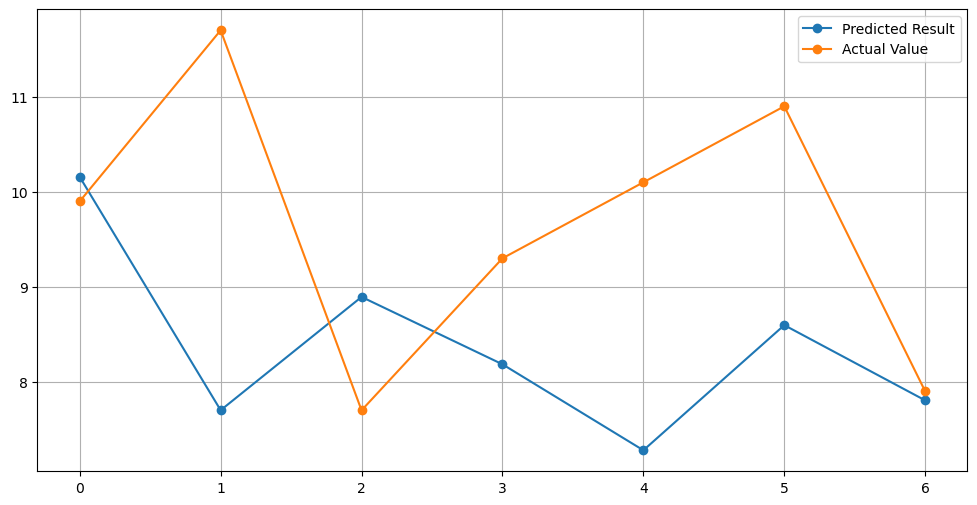

In [232]:
import matplotlib.pyplot as plt

predicted_results_5th_group = predicted_result[9, :, 0]
true_results_5th_group = Y2020[9, :, 0]

time_steps = range(len(predicted_results_5th_group))

plt.figure(figsize=(12, 6))
plt.plot(time_steps, predicted_results_5th_group, label='Predicted Result', linestyle='-', marker='o')
plt.plot(time_steps, true_results_5th_group, label='Actual Value', linestyle='-', marker='o')
plt.legend()
plt.grid(True)
plt.show()
